In [129]:
import pandas as pd
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,accuracy_score


In [130]:
india_liver_patient = pd.read_csv("/home/dbda/Desktop/arpan/ML/EXERCISES/2_Classification/indian_liver_patient.csv")

In [131]:
india_liver_patient.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [132]:
india_liver_patient.shape

(583, 11)

# 2. Data Preparation
1) One-hot encoded categorical variables

2) Split data into features and labels

3) Convert to arrays

4) Split data into training and testing sets

In [133]:
india_liver_patient.Albumin_and_Globulin_Ratio.isnull().any()

True

In [134]:
india_liver_patient.Albumin_and_Globulin_Ratio.fillna(india_liver_patient['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [135]:
india_liver_patient.Albumin_and_Globulin_Ratio.isnull().any()

False

In [136]:
india_liver_patient.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### 2.1 One-Hot Encoding

#### Takes categorical variables, such as days of the week and converts it to a numerical representation without an arbitrary ordering. 


In [137]:
india_liver_patient = pd.get_dummies(india_liver_patient)


In [138]:
india_liver_patient.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [139]:
india_liver_patient.shape

(583, 12)

### 2.2 Convert Features and Labels and Convert Data to Arrays


In [140]:
import numpy as np

labels = np.array(india_liver_patient.Label)
india_liver_patient=india_liver_patient.drop('Label',axis=1)
india_liver_patient_list=list(india_liver_patient.columns)
india_liver_patient=np.array(india_liver_patient)

### 2.4 Split the data into Training and Testing Sets

In [141]:
from sklearn.model_selection import train_test_split

india_liver_patient_train, india_liver_patient_test, train_labels, test_labels = train_test_split(india_liver_patient, labels, test_size= 0.25, random_state= 42)

In [142]:
print('Training Features Shape:', india_liver_patient_train.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', india_liver_patient_test.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (437, 11)
Training Labels Shape: (437,)
Testing Features Shape: (146, 11)
Testing Labels Shape: (146,)


# 4. Train Model

In [143]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(india_liver_patient_train,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# 5. Make Predictions on Test Data




In [144]:
predictions = rf.predict(india_liver_patient_test)


### Variable Importances

In [145]:
imp = list(rf.feature_importances_)
feature_importances = [(india_liver_patient_1, round(imp_1, 2)) for india_liver_patient_1, imp_1 in zip(india_liver_patient_list,imp)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)


# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Alkaline_Phosphotase Importance: 0.15
Variable: Alamine_Aminotransferase Importance: 0.13
Variable: Aspartate_Aminotransferase Importance: 0.13
Variable: Age                  Importance: 0.12
Variable: Total_Bilirubin      Importance: 0.09
Variable: Direct_Bilirubin     Importance: 0.09
Variable: Total_Protiens       Importance: 0.09
Variable: Albumin              Importance: 0.09
Variable: Albumin_and_Globulin_Ratio Importance: 0.07
Variable: Gender_Female        Importance: 0.01
Variable: Gender_Male          Importance: 0.01


### Visualizations

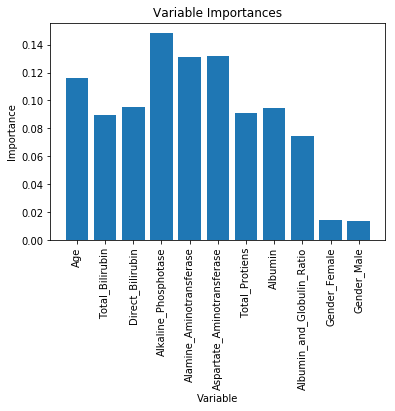

In [146]:
x_value = list(range(len(imp)))


import matplotlib.pyplot as plt


plt.bar(x_value, imp, orientation = 'vertical')

plt.xticks(x_value, india_liver_patient_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 


In [148]:
accuracy_score(test_labels,predictions)

0.7534246575342466

In [147]:
print(classification_report(test_labels,predictions))

             precision    recall  f1-score   support

          1       0.81      0.88      0.84       109
          2       0.52      0.38      0.44        37

avg / total       0.73      0.75      0.74       146

